## Import dependencies

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error  # MAE => Mean absolute error regression loss
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

## Load data

In [24]:
df = pd.read_excel("../data/raw/entrenamiento.xlsx")
df = df.rename(columns={"C7.1": "C8", "des": "QUALITY"})
features = df.drop(columns=["QUALITY"])
target = df["QUALITY"]

## Dataframe with rows with NaN values


In [25]:
# Dataframe with missing values
df_with_nan = df[df.isna().any(axis=1)]
df_features_with_nan = df_with_nan.drop(columns=["QUALITY"])
df_features_with_nan

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
1,6.2,0.246860,NaN,5.00,43.00,50.0,5.241747,0.99318,3.23,0.494696,10.8
6,9.2,0.536493,0.207014,6.20,42.00,15.0,4.543295,0.99480,NaN,0.292670,10.1
7,6.4,4.836282,0.254642,5.85,42.00,24.0,4.605170,992.00000,3.23,0.277632,NaN
10,6.9,0.182322,0.307485,1.50,31.00,38.0,4.997212,0.99310,NaN,0.444686,11.0
13,4.4,0.378436,0.095310,2.80,NaN,31.0,4.718499,0.98816,3.48,0.292670,13.1
...,...,...,...,...,...,...,...,...,...,...,...
3908,8.0,0.246860,0.350657,7.10,45.00,41.0,5.135798,0.99590,3.17,NaN,10.6
3911,6.1,NaN,0.148420,1.30,0.06,36.0,4.844187,0.99353,3.13,0.378436,8.7
3912,6.6,0.223144,0.270027,NaN,35.00,32.0,4.852030,0.99210,3.41,0.385262,11.3
3913,7.7,NaN,0.215111,11.20,31.00,41.0,5.123964,0.99480,3.12,0.357674,11.3


In [26]:
df_features_with_nan.describe().T

,count,mean,std,min,25%,50%,75%,max
C1,1896.0,6.840849,0.857073,3.900000,6.300000,6.800000,7.300000,14.200000
C2,1876.0,0.419985,0.983221,0.095310,0.190620,0.231112,0.285179,6.913737
C3,1860.0,0.283905,0.086899,0.000000,0.239017,0.277632,0.322083,0.802002
C4,1848.0,6.383604,5.201618,0.700000,1.675000,5.100000,9.800000,65.800000
C5,1871.0,40.405345,24.591270,0.020000,33.000000,41.000000,48.000000,301.000000
C6,1867.0,35.299143,16.744481,3.000000,23.000000,34.000000,45.000000,138.500000
C7,1857.0,4.884949,0.326461,3.218876,4.691348,4.905275,5.123964,5.906723
C8,1858.0,73.688186,258.741117,0.987110,0.991800,0.994035,0.996915,1001.000000
C9,1870.0,3.187348,0.150707,2.720000,3.090000,3.180000,3.280000,3.820000
C10,1851.0,0.394918,0.075675,0.223144,0.343590,0.385262,0.431782,0.732368


## Visualize variable distributions

/tmp/ipykernel_14100/3383574317.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3)
/tmp/ipykernel_14100/3383574317.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3)
/tmp/ipykernel_14100/3383574317.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3)
/tmp/ipykernel_14100/3383574317.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3)
/tmp/ipykernel_14100/3383574317.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3)
/tmp/ipykernel_14100/3383574317.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3)
/tmp/ipykernel_14100/3383574317.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3)
/tmp/ipykernel_14100/3383574317.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3)
/tmp/ipykernel_14100/3383574317.py:8: UserWarning: The figure layout has

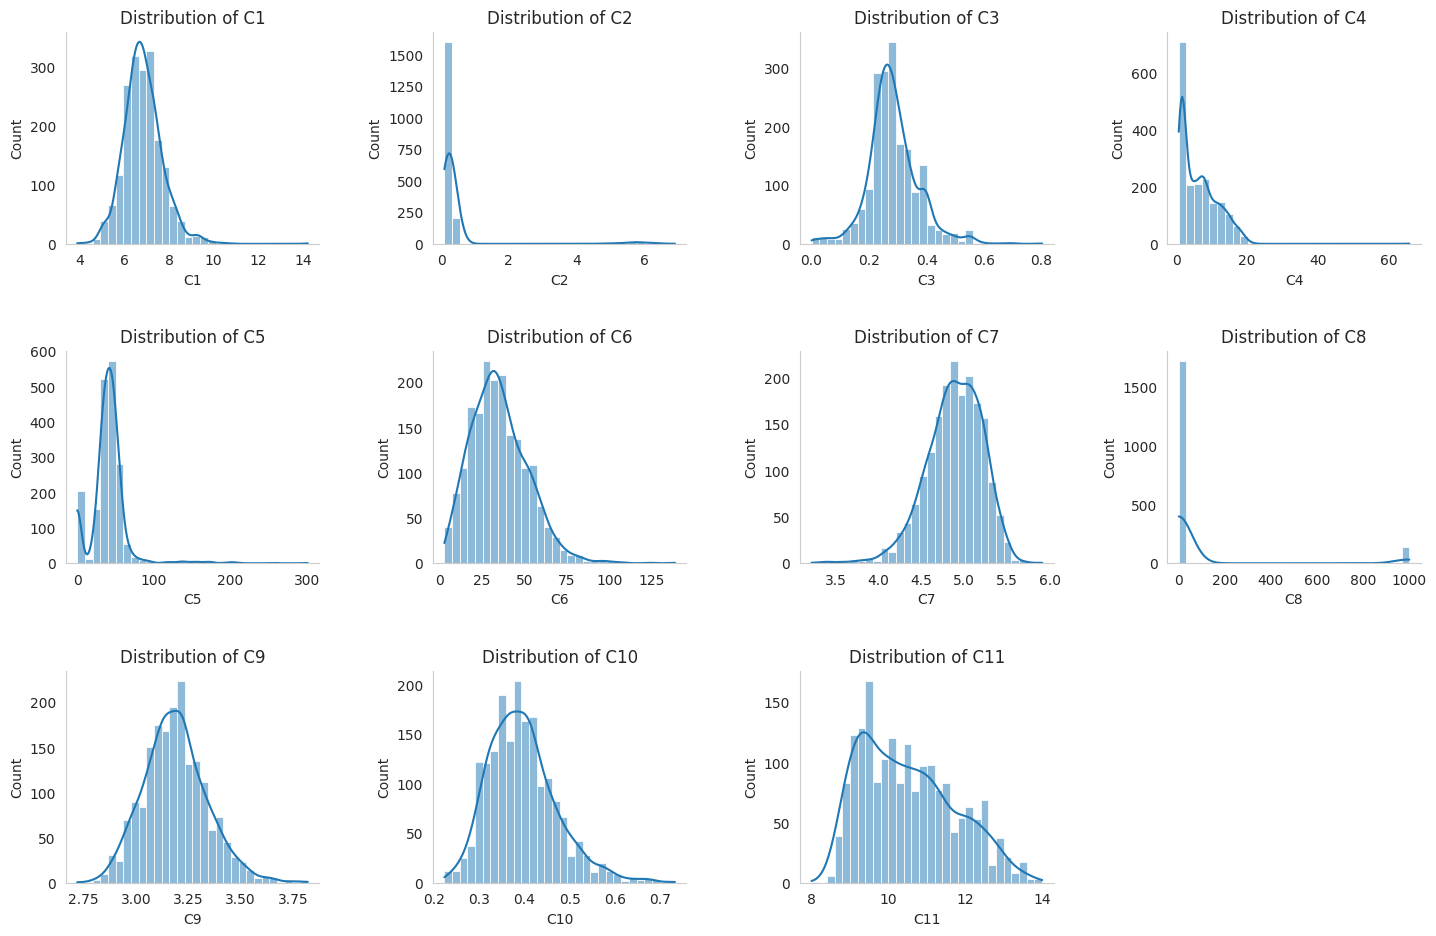

In [32]:
plt.figure(figsize=(15, 10))

# Plotting the distribution of each column
for i, column in enumerate(df_features_with_nan, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_features_with_nan[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
    plt.tight_layout(pad=3)
    plt.grid(False)
    sns.despine()
plt.show()

## Plot to see possible outliers

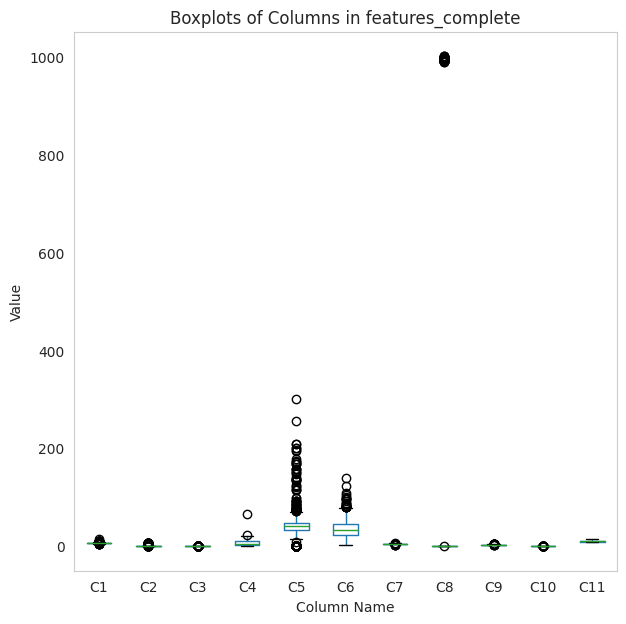

In [28]:
plt.figure(figsize=(7, 7))
df_features_with_nan.boxplot()
plt.title('Boxplot of Columns in features_complete')
plt.ylabel('Value')
plt.xlabel('Column Name')
plt.grid(False)
plt.show()

/tmp/ipykernel_14100/4261589524.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)
/tmp/ipykernel_14100/4261589524.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)
/tmp/ipykernel_14100/4261589524.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)
/tmp/ipykernel_14100/4261589524.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)
/tmp/ipykernel_14100/4261589524.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)
/tmp/ipykernel_14100/4261589524.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)
/tmp/ipykernel_14100/4261589524.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)
/tmp/ipykernel_14100/4261589524.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=5)
/tmp/ipykernel_14100/4261589524.py:7: UserWarning: The figure layout has

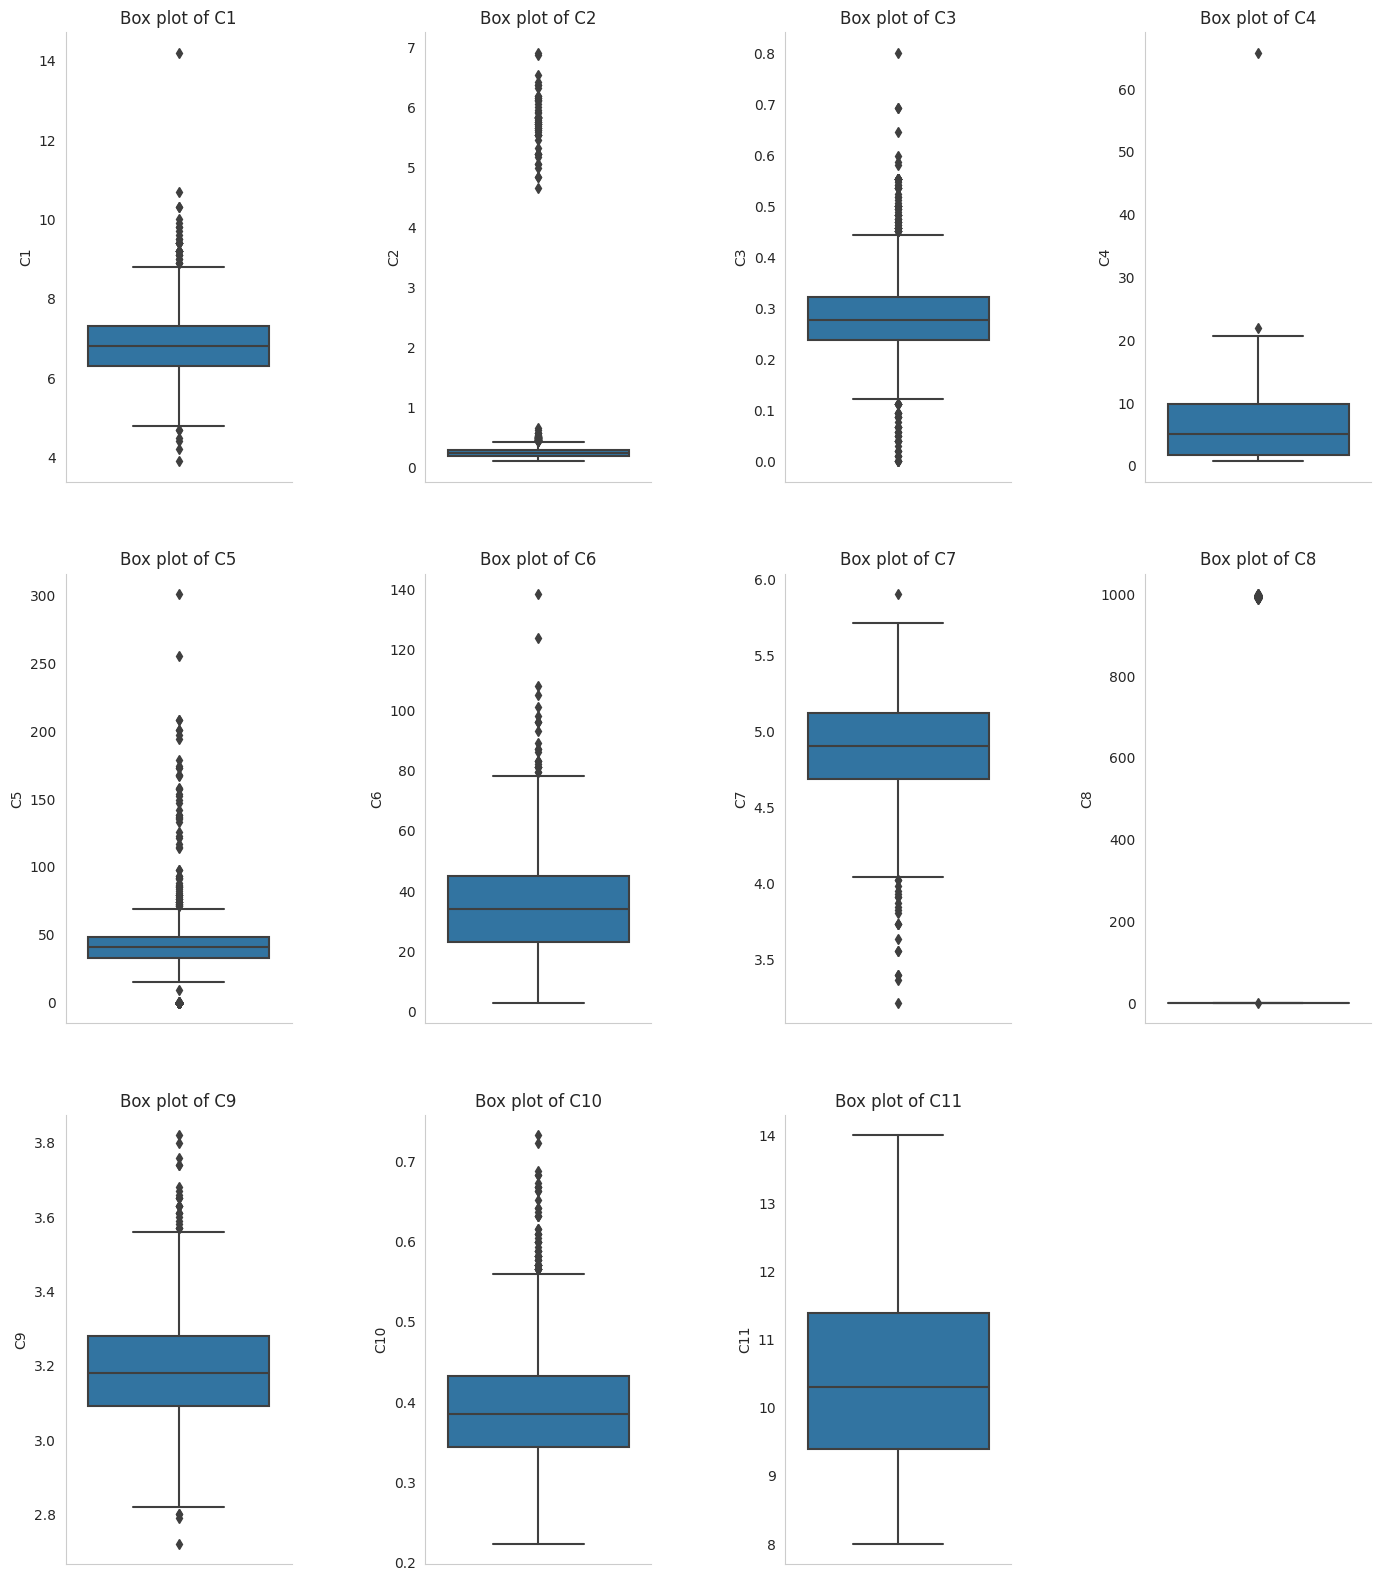

In [35]:
plt.figure(figsize=(15, 17))

for i, column in enumerate(df_features_with_nan.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_features_with_nan[column])
    plt.title(f"Box plot of {column}")
    plt.tight_layout(pad=5)
    plt.grid(False)
    sns.despine()

plt.show()

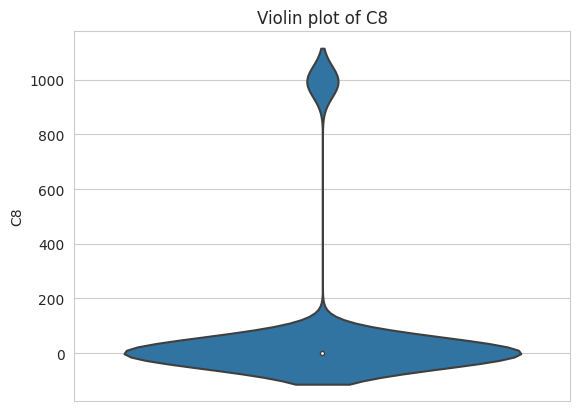

In [45]:
sns.violinplot(y=df_features_with_nan["C8"])
plt.title("Violin plot of C8")
plt.show()

## Use different methods to impute a value to missing values in features_complete_nan

### Imputation of missing values using MEDIAN

In [46]:
data_imputed_median = df_features_with_nan.fillna(df_features_with_nan.median())

data_imputed_median

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
1,6.2,0.246860,0.277632,5.00,43.00,50.0,5.241747,0.99318,3.23,0.494696,10.8
6,9.2,0.536493,0.207014,6.20,42.00,15.0,4.543295,0.99480,3.18,0.292670,10.1
7,6.4,4.836282,0.254642,5.85,42.00,24.0,4.605170,992.00000,3.23,0.277632,10.3
10,6.9,0.182322,0.307485,1.50,31.00,38.0,4.997212,0.99310,3.18,0.444686,11.0
13,4.4,0.378436,0.095310,2.80,41.00,31.0,4.718499,0.98816,3.48,0.292670,13.1
...,...,...,...,...,...,...,...,...,...,...,...
3908,8.0,0.246860,0.350657,7.10,45.00,41.0,5.135798,0.99590,3.17,0.385262,10.6
3911,6.1,0.231112,0.148420,1.30,0.06,36.0,4.844187,0.99353,3.13,0.378436,8.7
3912,6.6,0.223144,0.270027,5.10,35.00,32.0,4.852030,0.99210,3.41,0.385262,11.3
3913,7.7,0.231112,0.215111,11.20,31.00,41.0,5.123964,0.99480,3.12,0.357674,11.3
